<a href="https://colab.research.google.com/github/sudeep-009/Classification-Capstone-Project--Card-Default-Prediction/blob/dev/Copy_of_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
import warnings
warnings.filterwarnings("ignore") 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
import seaborn as sns
sns.set_theme(style="whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading of the dataset
card_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/Classification Capstone Project/default of credit card clients.xls - Data.csv',header = 1, index_col ='ID')

#**Understanding Data**

In [ ]:
card_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Number of records and features present in the dataset**

In [ ]:
# number of records and number of features
print('Number of records present in the dataset is {}'.format(card_df.shape[0]))
print('Number of features present in the dataset is {}'.format(card_df.shape[1]))

Number of records present in the dataset is 30000
Number of features present in the dataset is 24


**Number of duplicate value present in the dataset**

In [ ]:
# checking duplicate records
len(card_df[card_df.duplicated(subset=None,keep='first')])

35

**Dropping the duplicate Value present in the dataset**

In [ ]:
card_df.drop_duplicates(keep='first', inplace=True)

**Findings:** There is no duplicate item in the dataset.

**Number of null Value present in the dataset**

In [ ]:
# checking of null values
card_df.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**Finding:** There is no null value present in the dataset.

**Concise Summary of Dataset**

In [ ]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   29965 non-null  int64
 1   SEX                         29965 non-null  int64
 2   EDUCATION                   29965 non-null  int64
 3   MARRIAGE                    29965 non-null  int64
 4   AGE                         29965 non-null  int64
 5   PAY_0                       29965 non-null  int64
 6   PAY_2                       29965 non-null  int64
 7   PAY_3                       29965 non-null  int64
 8   PAY_4                       29965 non-null  int64
 9   PAY_5                       29965 non-null  int64
 10  PAY_6                       29965 non-null  int64
 11  BILL_AMT1                   29965 non-null  int64
 12  BILL_AMT2                   29965 non-null  int64
 13  BILL_AMT3                   29965 non-null  int64
 14  BILL_A

**Finding:** All are of categorical type.

Transforming all the features from categorical to integer type

In [ ]:
# data type of columns
for i in card_df.columns:
  card_df = card_df.astype({i: int}, errors='raise') 

In [ ]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   29965 non-null  int64
 1   SEX                         29965 non-null  int64
 2   EDUCATION                   29965 non-null  int64
 3   MARRIAGE                    29965 non-null  int64
 4   AGE                         29965 non-null  int64
 5   PAY_0                       29965 non-null  int64
 6   PAY_2                       29965 non-null  int64
 7   PAY_3                       29965 non-null  int64
 8   PAY_4                       29965 non-null  int64
 9   PAY_5                       29965 non-null  int64
 10  PAY_6                       29965 non-null  int64
 11  BILL_AMT1                   29965 non-null  int64
 12  BILL_AMT2                   29965 non-null  int64
 13  BILL_AMT3                   29965 non-null  int64
 14  BILL_A

**Renaming Column names**

In [ ]:
#Rename
card_df.rename(columns={'PAY_0':'PAY_SEP','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR',
            'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR',
              'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR',
                'default payment next month':'IS_Defaulter'},inplace=True)

**Statistical Summary of DataSet**

In [ ]:
# statistical summary of dataset
card_df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,29965.0,167442.005006,129760.135222,10000.0,50000.0,140000.0,240000.0,1000000.0
SEX,29965.0,1.603738,0.489128,1.0,1.0,2.0,2.0,2.0
EDUCATION,29965.0,1.853629,0.790411,0.0,1.0,2.0,2.0,6.0
MARRIAGE,29965.0,1.551877,0.521997,0.0,1.0,2.0,2.0,3.0
AGE,29965.0,35.487969,9.219459,21.0,28.0,34.0,41.0,79.0
PAY_SEP,29965.0,-0.016753,1.123492,-2.0,-1.0,0.0,0.0,8.0
PAY_AUG,29965.0,-0.131854,1.196322,-2.0,-1.0,0.0,0.0,8.0
PAY_JUL,29965.0,-0.164392,1.195878,-2.0,-1.0,0.0,0.0,8.0
PAY_JUN,29965.0,-0.218922,1.168175,-2.0,-1.0,0.0,0.0,8.0
PAY_MAY,29965.0,-0.264509,1.132220,-2.0,-1.0,0.0,0.0,8.0


**Unique Value Present in Each of the feature columns**

In [ ]:
# unique value present in the dataset
for i in card_df.columns:
  print('Number of unique value present in feature {}'.format(i))
  print(card_df[i].unique())
  print('------------------------------')

Number of unique value present in feature LIMIT_BAL
[  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
------------------------------
Number of unique value present in feature SEX
[2 1]
------------------------------
Number of unique value present in feature EDUCATION
[2 1 3 5 4 6 0]
------------------------------
Number of unique value present in feature MARRIAGE
[1 2 3 0]
----------------

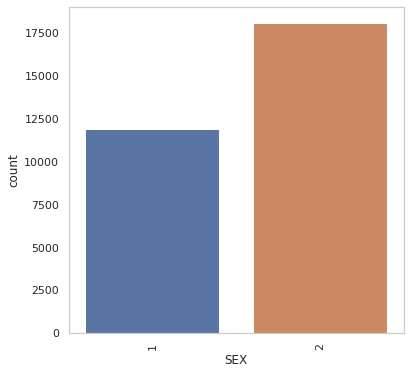

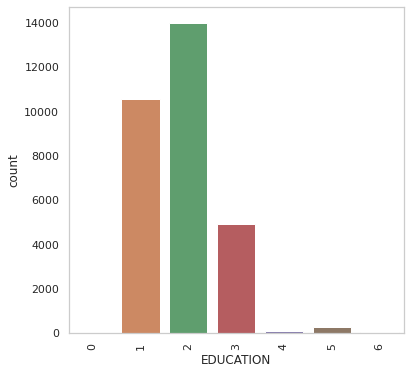

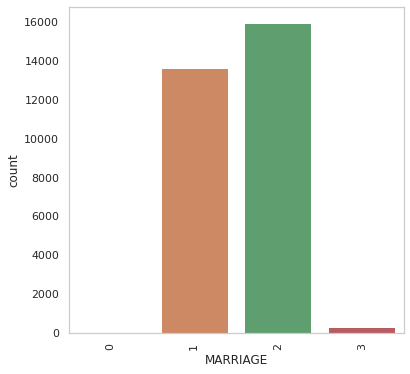

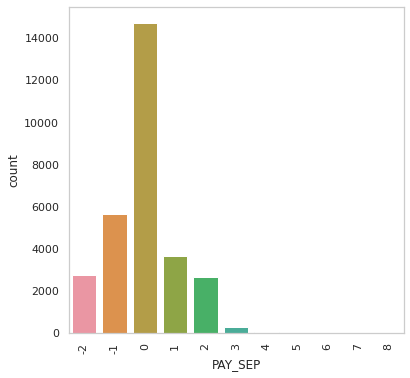

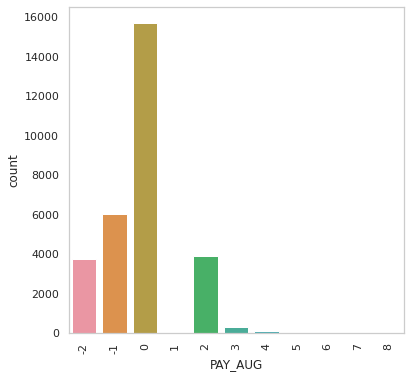

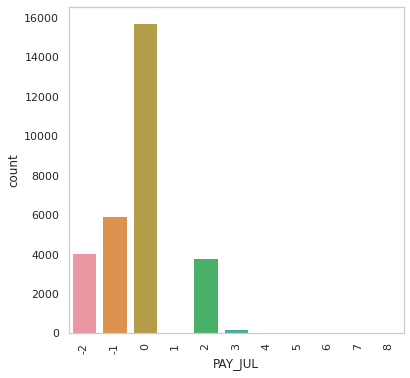

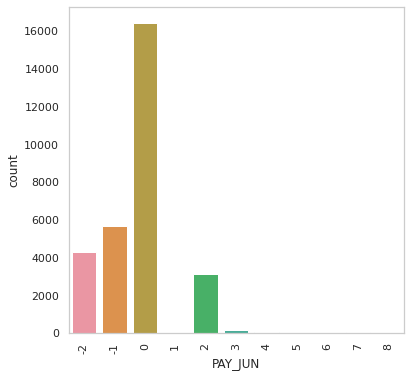

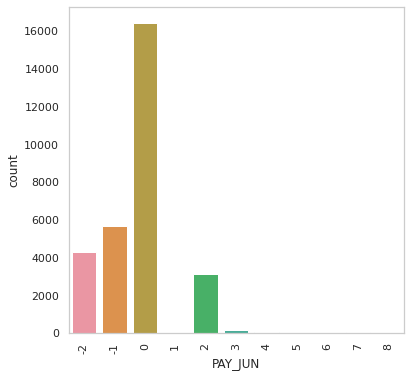

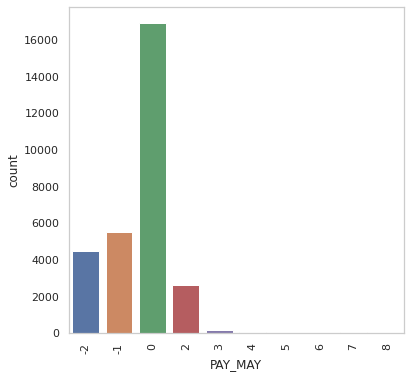

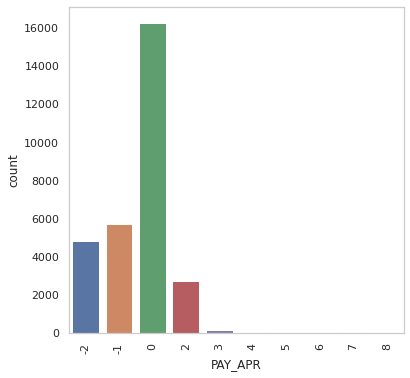

In [ ]:
# performing eda on the dataset
features = ['SEX','EDUCATION','MARRIAGE','PAY_SEP','PAY_AUG','PAY_JUL','PAY_JUN','PAY_JUN','PAY_MAY','PAY_APR']
for i in features:
  plt.figure(figsize=(6,6))
  # evaluating count of features labels
  sns.countplot(card_df[i])
  plt.xticks(rotation=90)
  
  plt.show()

**Findings:**
1. More female card holder than men.

#**Data Processing**

**Education:**

In [ ]:
# grouping unknown value into others
card_df['EDUCATION'].value_counts()

2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
#Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
#capping rest of the values into others
edu_dict = {1: 'graduate', 2: 'university', 3: 'high school', 4: 'other',5: 'other', 6: 'other', 0: 'other'}
card_df['EDUCATION'] = card_df['EDUCATION'].map(edu_dict)

**Marriage:**

In [ ]:
card_df['MARRIAGE'].value_counts()

2    15945
1    13643
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
#Marital status (1 = married; 2 = single; 3 = others).
# capping 0 into others
marriage_dict = {1: 'married', 2: 'single', 3: 'other', 0: 'other'}
card_df['MARRIAGE'] = card_df['MARRIAGE'].map(marriage_dict)

**Gender:**

In [ ]:
card_df['SEX'].value_counts()

2    18091
1    11874
Name: SEX, dtype: int64

In [ ]:
gender_dict = {1: 'male', 2: 'female'}
card_df['SEX'] = card_df['SEX'].map(gender_dict)

**Probability of default payment next month**

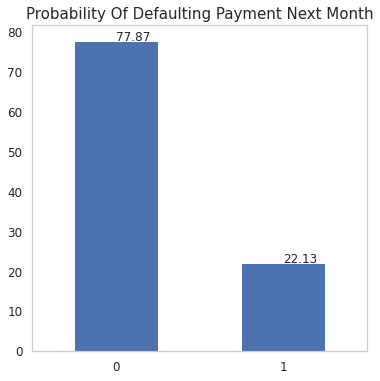

In [ ]:
# finding the class imbalance
def_cnt = (card_df['IS_Defaulter'].value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.grid(False)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,round(y,2),fontsize=12)
plt.show()

**Findings:**We can see that the dataset consists of 77% clients are not expected to default payment whereas 23% clients are expected to default the payment

**Age and Balance Limit**

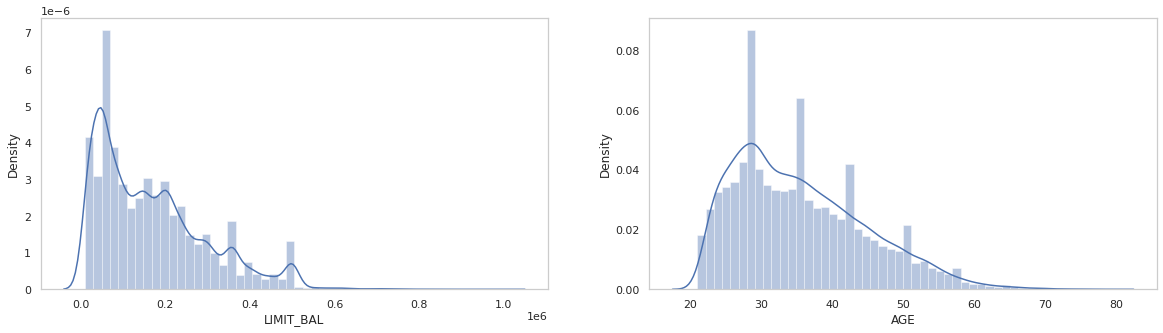

In [ ]:
# univariate data analysis
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(card_df.LIMIT_BAL)
plt.grid(False)
plt.subplot(122)
sns.distplot(card_df.AGE)
plt.grid(False)
plt.show()

**Findings:** 

1. dataset consists of skewed data of limiting balance and age of clients.
2. We have more number of clients having limiting balance between 0 to 200000 currency.
3. We have more number of clients from age bracket of 20 to 40, i.e., clients from mostly young to mid aged groups.
We will observe the effect of variables on target variable below

<Figure size 360x360 with 0 Axes>

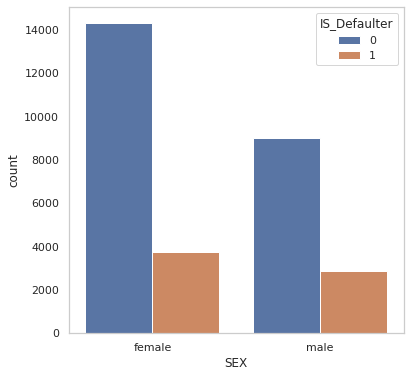

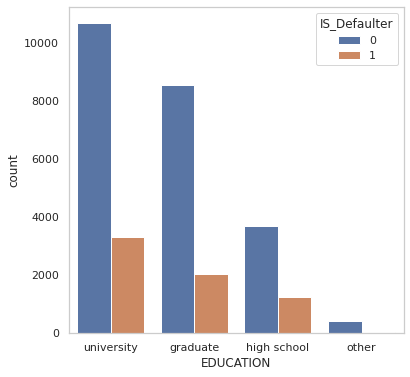

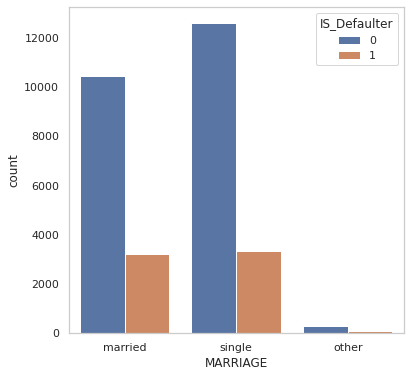

In [ ]:
plt.figure(figsize=(5,5))
for i in card_df[['SEX', 'EDUCATION', 'MARRIAGE']]:
  plt.figure(figsize=(6,6))
  sns.set_theme(style="whitegrid")
  sns.countplot(x=i,data=card_df,hue="IS_Defaulter")
  plt.grid(False)
  plt.show() 
  

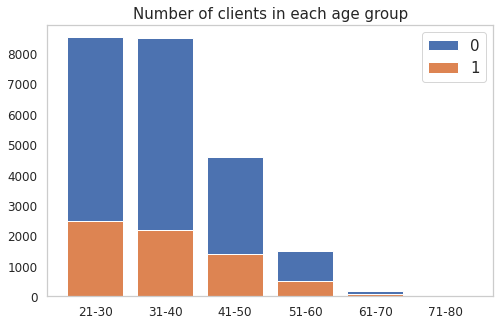

In [ ]:

bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
card_df['AGE_BIN'] = pd.cut(x=card_df.AGE, bins=bins, labels=names, right=True)
age_cnt = card_df.AGE_BIN.value_counts()
age_0 = (card_df.AGE_BIN[card_df['IS_Defaulter'] == 0].value_counts())
age_1 = (card_df.AGE_BIN[card_df['IS_Defaulter'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.grid(False)
plt.show()

**Findings:**
With increasing age group the number of clients that will default the payment next month is decreasing. Hence we can see that Age is important feature to predict the default payment for next month.

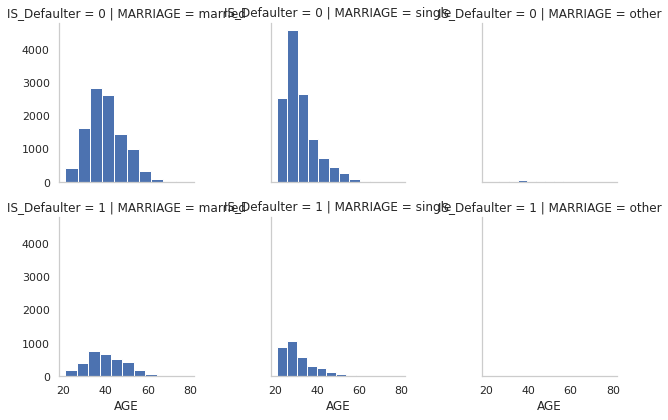

In [ ]:

sns.set_style("whitegrid", {'axes.grid' : False})
g = sns.FacetGrid(card_df, row='IS_Defaulter', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

**Findings:** Married people between age bracket of 30 and 50 and unmarried clients of age 20-30 tend to default payment with unmarried clients higher probability to default payment. Hence we can include MARRIAGE feature of clients to find probability of defaulting the payment next month

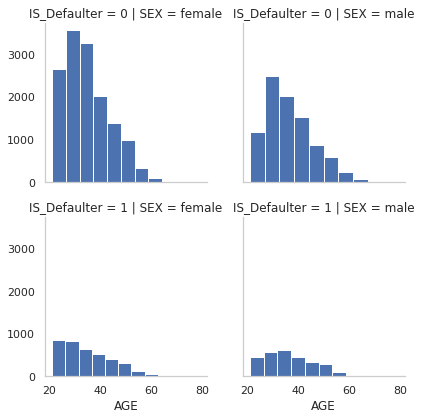

In [ ]:
g = sns.FacetGrid(card_df, row='IS_Defaulter', col='SEX')
sns.set_style("whitegrid", {'axes.grid' : False})
g = g.map(plt.hist, 'AGE')

**Findings:** Females of age group 20-30 have very high tendency to default payment compared to males in all age brackets. Hence we can keep the SEX column of clients to predict probability of defaulting payment.

In [ ]:
card_df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'IS_Defaulter', 'AGE_BIN'],
      dtype='object')

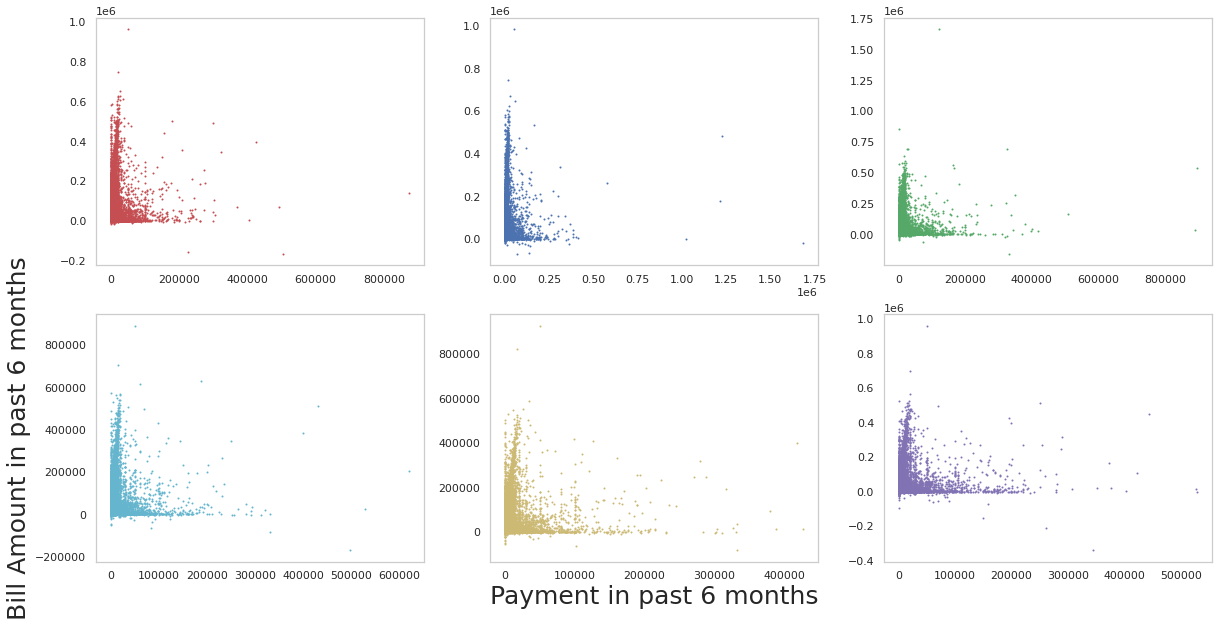

In [ ]:
plt.subplots(figsize=(20,10))


plt.subplot(231)
plt.scatter(x=card_df.PAY_AMT_SEPT, y=card_df.BILL_AMT_SEPT, c='r', s=1)

plt.subplot(232)
plt.scatter(x=card_df.PAY_AMT_AUG, y=card_df.BILL_AMT_AUG, c='b', s=1)

plt.subplot(233)
plt.scatter(x=card_df.PAY_AMT_JUL, y=card_df.BILL_AMT_JUL, c='g', s=1)

plt.subplot(234)
plt.scatter(x=card_df.PAY_AMT_JUN, y=card_df.BILL_AMT_JUN, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)


plt.subplot(235)
plt.scatter(x=card_df.PAY_AMT_MAY, y=card_df.BILL_AMT_MAY, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=card_df.PAY_AMT_APR, y=card_df.BILL_AMT_APR, c='m', s=1)

plt.show()

**Findings:** There is higher proportion of clients for whom the bill amount is high but payment done against the same is very low.

In [ ]:
card_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IS_Defaulter,AGE_BIN
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,21-30
2,120000,female,university,single,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,21-30
3,90000,female,university,single,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,31-40
4,50000,female,university,married,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,31-40
5,50000,male,university,married,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,51-60


**Finding Outlier in the continuours input features**

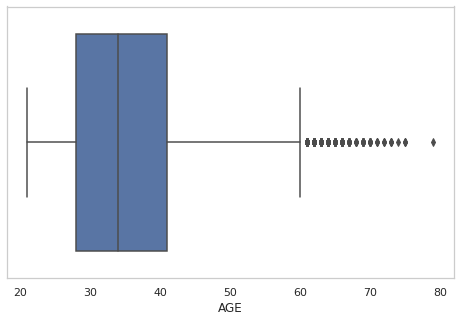

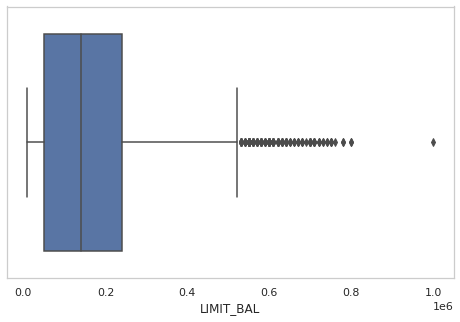

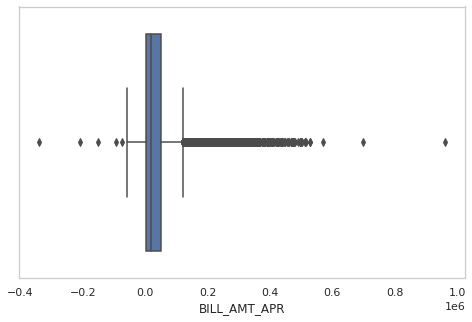

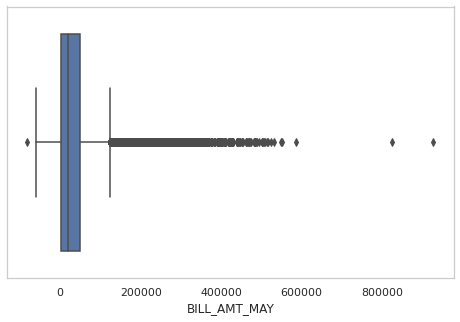

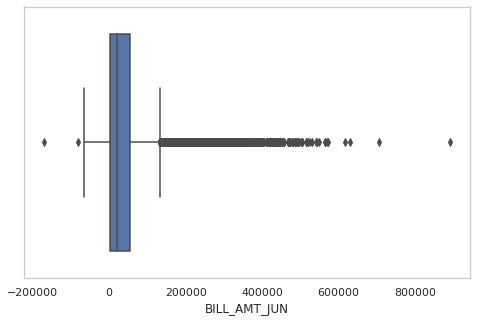

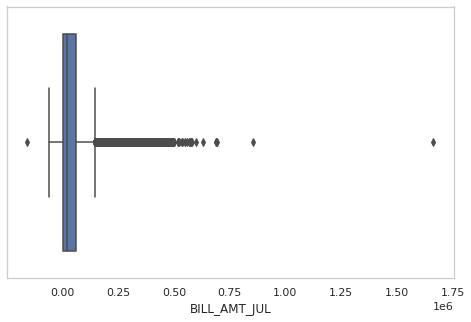

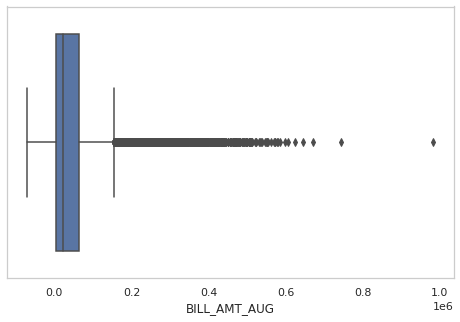

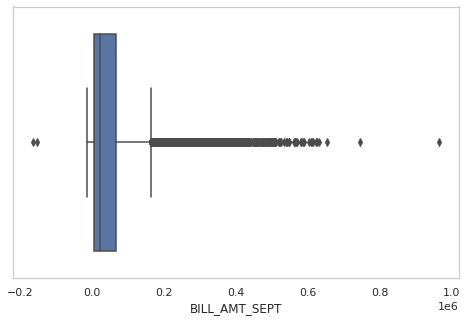

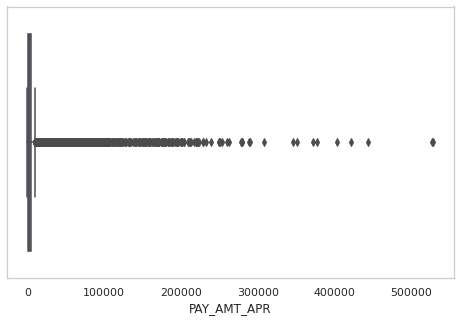

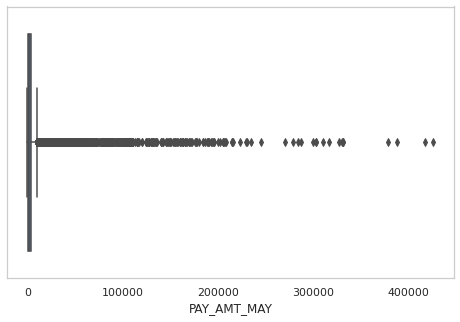

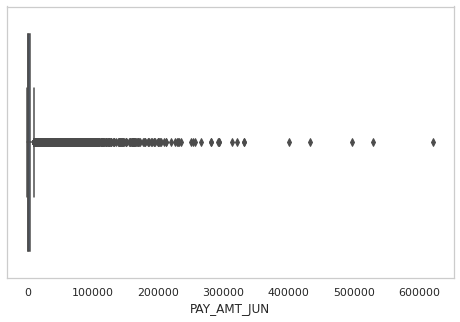

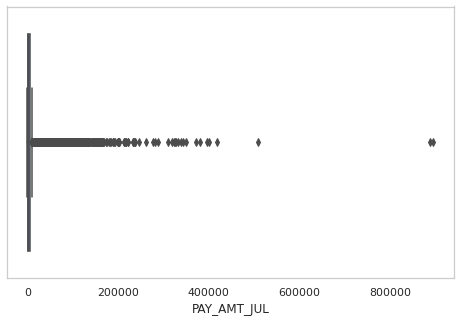

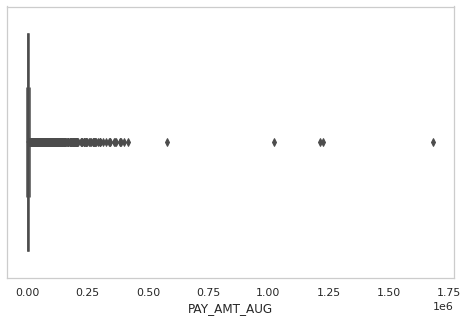

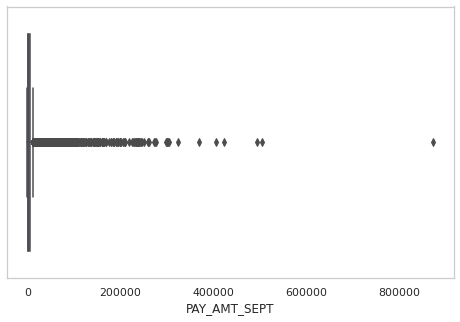

In [ ]:
continuous_features = ['AGE','LIMIT_BAL','BILL_AMT_APR','BILL_AMT_MAY','BILL_AMT_JUN','BILL_AMT_JUL','BILL_AMT_AUG','BILL_AMT_SEPT','PAY_AMT_APR','PAY_AMT_MAY','PAY_AMT_JUN','PAY_AMT_JUL','PAY_AMT_AUG','PAY_AMT_SEPT']
for i in continuous_features:
  plt.figure(figsize=(8,5))
  sns.boxplot(card_df[i])
  plt.show()

**Findings:**
1. As Logistic Regression is not so much get affected by outlier hence we will not remove any outlier here

In [ ]:
final_df = card_df.copy()
final_df = pd.get_dummies(final_df, columns=['SEX','EDUCATION','MARRIAGE'])

In [ ]:
final_df.drop(['AGE_BIN'],axis=1,inplace=True)

**Finding Correlation**

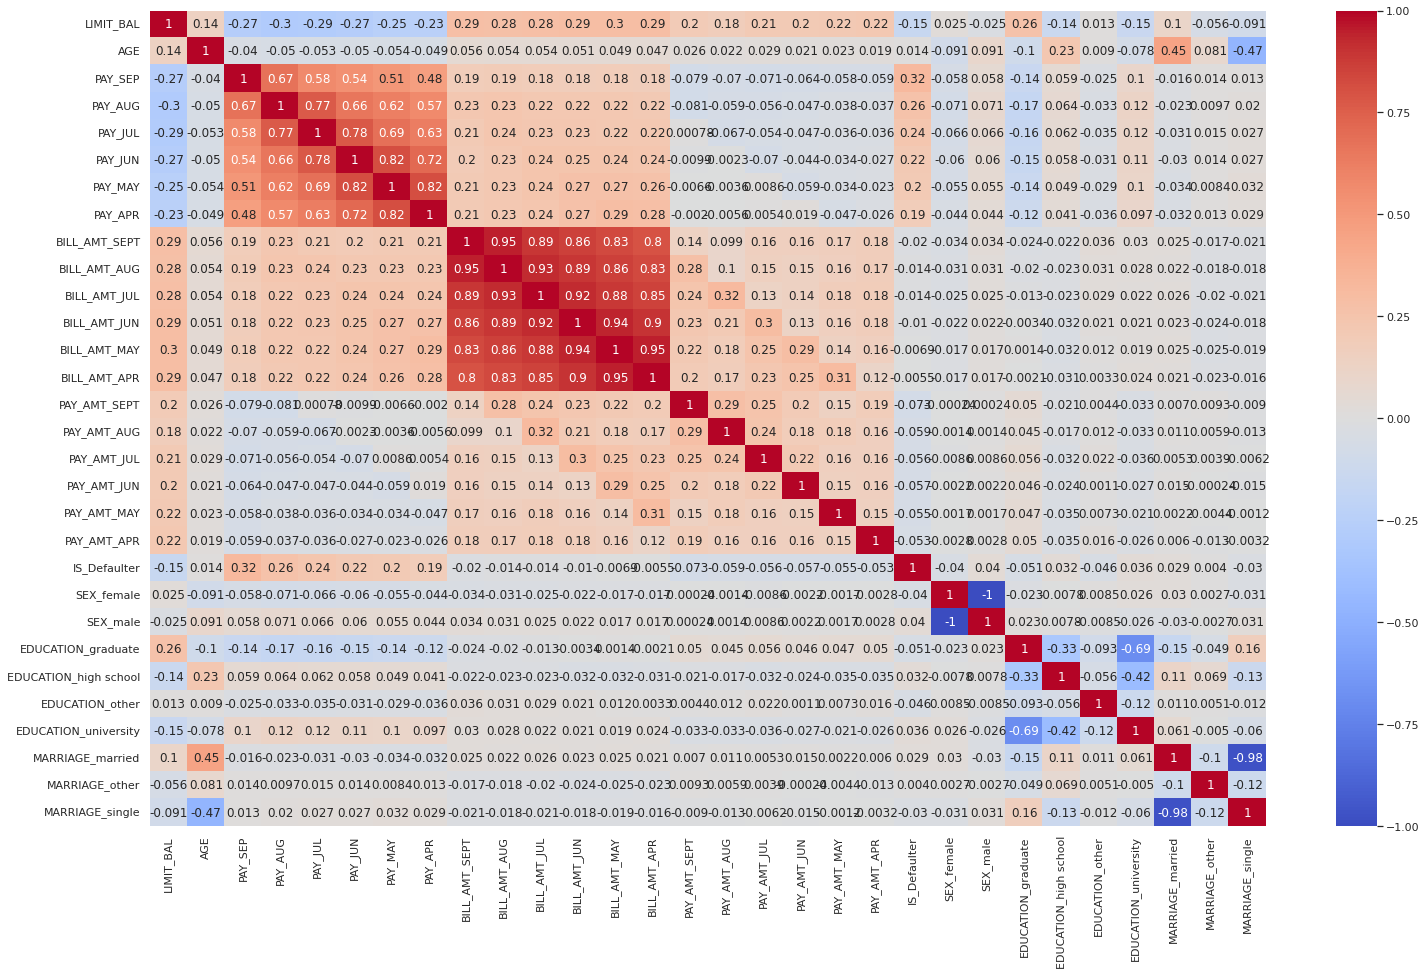

In [ ]:
#finding correlation between max capacity and car type
plt.figure(figsize=(25,15))
sns.heatmap(final_df.corr(method='pearson', min_periods=1),cmap='coolwarm',annot=True)

**Findings:**
1. Keeping only payment in september as all other month are highly collinear.
2. Keeping only bill amount in september as all other are highly collinear.
3. Keeping only female.
4. Keeping only single.

**Variation Inflation Factor**

Variation Inflation Factor is also another way of measuring multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = final_df[[i for i in final_df.columns if i != 'IS_Defaulter']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)


                  feature        VIF
0               LIMIT_BAL   1.580075
1                     AGE   1.384828
2                 PAY_SEP   1.927946
3                 PAY_AUG   3.172491
4                 PAY_JUL   3.648499
5                 PAY_JUN   4.276045
6                 PAY_MAY   4.712152
7                 PAY_APR   3.248320
8           BILL_AMT_SEPT  14.029114
9            BILL_AMT_AUG  25.852341
10           BILL_AMT_JUL  21.770635
11           BILL_AMT_JUN  20.338433
12           BILL_AMT_MAY  24.992359
13           BILL_AMT_APR  15.035734
14           PAY_AMT_SEPT   1.708261
15            PAY_AMT_AUG   2.237214
16            PAY_AMT_JUL   1.757971
17            PAY_AMT_JUN   1.648678
18            PAY_AMT_MAY   1.688082
19            PAY_AMT_APR   1.169955
20             SEX_female        inf
21               SEX_male        inf
22     EDUCATION_graduate        inf
23  EDUCATION_high school        inf
24        EDUCATION_other        inf
25   EDUCATION_university        inf
2

**Feature to be dropped because of collinearity**

In [ ]:
drop_feature = ['PAY_APR','PAY_MAY','PAY_JUN','PAY_JUL','PAY_AUG','BILL_AMT_APR','BILL_AMT_MAY','BILL_AMT_JUN','BILL_AMT_JUL','BILL_AMT_AUG','MARRIAGE_single','SEX_male']
final_df.drop(drop_feature,axis=1,inplace=True)

In [ ]:
#correlation matrix after removing multi collinearity
X = final_df[[i for i in final_df.columns if i != 'IsDefaulter']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                  feature       VIF
0               LIMIT_BAL  3.757401
1                     AGE  6.197751
2                 PAY_SEP  1.223207
3           BILL_AMT_SEPT  1.903634
4            PAY_AMT_SEPT  1.315884
5             PAY_AMT_AUG  1.232620
6             PAY_AMT_JUL  1.258565
7             PAY_AMT_JUN  1.227445
8             PAY_AMT_MAY  1.207867
9             PAY_AMT_APR  1.206102
10             SEX_female  2.031732
11     EDUCATION_graduate  2.255513
12  EDUCATION_high school  1.657102
13        EDUCATION_other  1.052475
14   EDUCATION_university  2.621865
15       MARRIAGE_married  1.901729
16         MARRIAGE_other  1.030046


**Removing Unbalancing in Target Variable**

In [ ]:
#importing SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(final_df[(i for i in list(final_df.describe(include='all').columns) if i != 'IS_Defaulter')], final_df['IS_Defaulter'])

print('Original unbalanced dataset shape', len(final_df))
print('Resampled balanced dataset shape', len(y_smote))

final_df = pd.DataFrame(x_smote, columns=list(i for i in list(final_df.describe(include='all').columns) if i != 'IS_Defaulter'))
final_df['IsDefaulter'] = y_smote

Original unbalanced dataset shape 29965
Resampled balanced dataset shape 46670


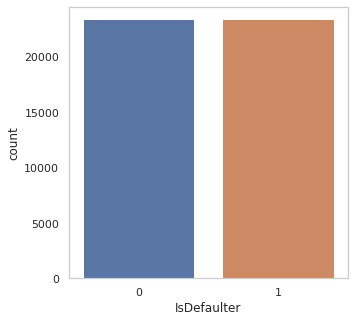

In [ ]:
#check for class imbalance
plt.figure(figsize=(5,5))
sns.countplot('IsDefaulter', data = final_df)

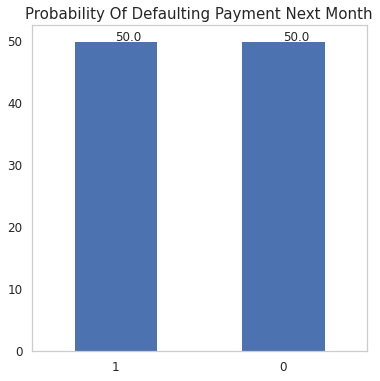

In [ ]:
def_cnt = (final_df['IsDefaulter'].value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.grid(False)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,round(y,2),fontsize=12)
plt.show()

In [ ]:
final_df.head()

,LIMIT_BAL,AGE,PAY_SEP,BILL_AMT_SEPT,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,SEX_female,EDUCATION_graduate,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MARRIAGE_married,MARRIAGE_other,IsDefaulter
0,20000,24,2,3913,0,689,0,0,0,0,1,0,0,0,1,1,0,1
1,120000,26,-1,2682,0,1000,1000,1000,0,2000,1,0,0,0,1,0,0,1
2,90000,34,0,29239,1518,1500,1000,1000,1000,5000,1,0,0,0,1,0,0,0
3,50000,37,0,46990,2000,2019,1200,1100,1069,1000,1,0,0,0,1,1,0,0
4,50000,57,-1,8617,2000,36681,10000,9000,689,679,0,0,0,0,1,1,0,0


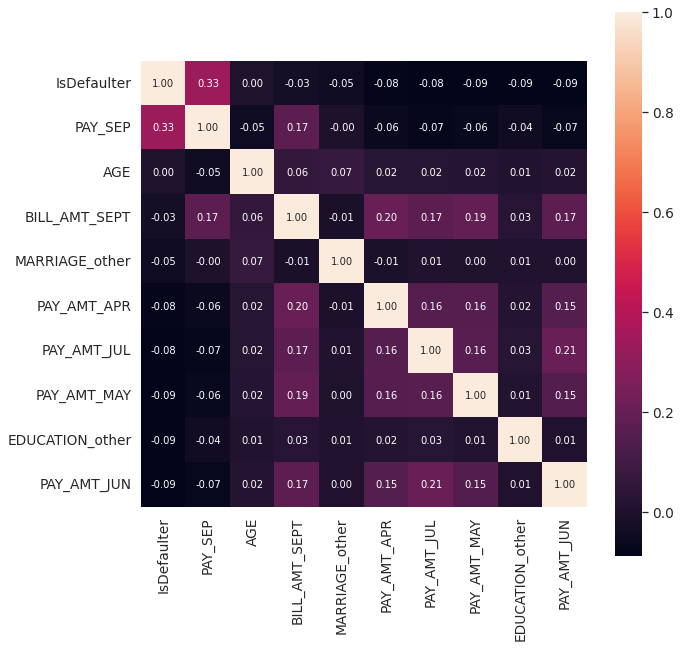

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat = final_df.corr()
cols = corrmat.nlargest(k, 'IsDefaulter')['IsDefaulter'].index
cm = np.corrcoef(final_df[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

##**Model Building**

###**Logistic Regression and Ridge Classifier**

In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc,classification_report

In [ ]:
#function for test and train evaluation report
def trainEvaluation(xTrain,yTrain,model):
  print('-----------------Train Set Evaluation--------------------')
  yTrainPred = model.predict(xTrain)
  print(classification_report(yTrainPred, yTrain))
  print(confusion_matrix(yTrainPred, yTrain))
  print('\nAccuracy Score for model on Train Set: ', accuracy_score(yTrainPred,yTrain))
  print('\n')
  

def testEvaluation(xTest,yTest,model):
  print('-----------------Test Set Evaluation--------------------')
  yTestPred = model.predict(xTest)
  print(classification_report(yTestPred, yTest))
  print(confusion_matrix(yTestPred, yTest))
  print('\nAccuracy Score for model on Test: ', accuracy_score(yTestPred,yTest))
  


In [ ]:
method_names = []
method_scores = []
#These are for barplot in conclusion

*Min Max Scaling For Logistic Regression*

In [ ]:
#X and Y split
X = final_df[[i for i in final_df.columns if i != 'IsDefaulter']]
Y = final_df.IsDefaulter

#scaling of input features
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)

*Train Test Split*

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_scale,Y,test_size=0.8,random_state=12)

*Training and Evaluation of Model*

In [ ]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
method_names.append("Logistic_Reg.")
method_scores.append(logReg.score(X_test,y_test))


,Train Accuracy,Model Name


In [ ]:
trainEvaluation(X_train,y_train,logReg)
testEvaluation(X_test,y_test,logReg)

-----------------Train Set Evaluation--------------------
              precision    recall  f1-score   support

           0       0.87      0.75      0.80      5402
           1       0.71      0.84      0.77      3932

    accuracy                           0.79      9334
   macro avg       0.79      0.80      0.79      9334
weighted avg       0.80      0.79      0.79      9334

[[4032 1370]
 [ 613 3319]]

Accuracy Score for model on Train Set:  0.7875508892221984


-----------------Test Set Evaluation--------------------
              precision    recall  f1-score   support

           0       0.87      0.74      0.80     21912
           1       0.70      0.84      0.76     15424

    accuracy                           0.78     37336
   macro avg       0.78      0.79      0.78     37336
weighted avg       0.80      0.78      0.79     37336

[[16274  5638]
 [ 2416 13008]]

Accuracy Score for model on Test:  0.7842832654810371


###**Ridge Classifier**

In [ ]:
rClassifier = RidgeClassifier()
rClassifier.fit(X_train, y_train)
method_names.append("Ridge_Classifier.")
method_scores.append(rClassifier.score(X_test,y_test))

In [ ]:
trainEvaluation(X_train,y_train,rClassifier)
testEvaluation(X_test,y_test,rClassifier)
modelComparision('Ridge Classifier',rClassifier)
modelComparision_df

-----------------Train Set Evaluation--------------------
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      5650
           1       0.68      0.87      0.76      3684

    accuracy                           0.79      9334
   macro avg       0.79      0.80      0.79      9334
weighted avg       0.81      0.79      0.79      9334

[[4160 1490]
 [ 485 3199]]

Accuracy Score for model on Train Set:  0.7884079708592243


-----------------Test Set Evaluation--------------------
              precision    recall  f1-score   support

           0       0.89      0.73      0.80     22802
           1       0.67      0.86      0.76     14534

    accuracy                           0.78     37336
   macro avg       0.78      0.80      0.78     37336
weighted avg       0.81      0.78      0.79     37336

[[16683  6119]
 [ 2007 12527]]

Accuracy Score for model on Test:  0.7823548317977287


,Model Name,Train_Accuracy,Test_Accuracy,Train Recall,Test Recall,Train F1-Score,Test F1-Score


###**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#fitting data into Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
method_names.append("Decision_Tree.")
method_scores.append(dtc.score(X_test,y_test))

In [ ]:
#model evaluation
trainEvaluation(X_train,y_train,dtc)
testEvaluation(X_test,y_test,dtc)

-----------------Train Set Evaluation--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4645
           1       1.00      1.00      1.00      4689

    accuracy                           1.00      9334
   macro avg       1.00      1.00      1.00      9334
weighted avg       1.00      1.00      1.00      9334

[[4645    0]
 [   0 4689]]

Accuracy Score for model on Train Set:  1.0


-----------------Test Set Evaluation--------------------
              precision    recall  f1-score   support

           0       0.73      0.74      0.73     18321
           1       0.75      0.73      0.74     19015

    accuracy                           0.74     37336
   macro avg       0.74      0.74      0.74     37336
weighted avg       0.74      0.74      0.74     37336

[[13572  4749]
 [ 5118 13897]]

Accuracy Score for model on Test:  0.7357242339832869


###**Decision Tree With Hyperparameter Tuning**

In [ ]:
# we are going to tune criterion, depth, min_samples_split, min_samples_leaf
criterion=['gini', 'entropy']
max_depth=[1,6,8,11,12,13,14,15,20]
min_samples_split=[1,9,11,12]
min_samples_leaf=[1,3,7,9]
param_grid={'max_depth':max_depth,
            'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,
           'criterion':criterion}

In [ ]:
from sklearn.model_selection import GridSearchCV
#cv=3 i.e 3 cross folds, verbose=200 i.e the more the verbose the more info we get
grid=GridSearchCV(DecisionTreeClassifier(),param_grid,n_jobs=-1,cv=3,verbose=200)
grid.fit(X_train,y_train)
#best parameters that achieves higher score
grid.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 7,
 'min_samples_split': 9}

In [ ]:
dt_hyper=DecisionTreeClassifier(criterion= 'entropy',
 max_depth=12,
 min_samples_leaf= 1,
 min_samples_split= 9)
dt_hyper.fit(X_train,y_train)
method_names.append("HyperParamTuneDecisionTree.")
method_scores.append(dt_hyper.score(X_test,y_test))

In [ ]:
#model evaluation
trainEvaluation(X_train,y_train,dt_hyper)
testEvaluation(X_test,y_test,dt_hyper)

-----------------Train Set Evaluation--------------------
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      4890
           1       0.86      0.91      0.88      4444

    accuracy                           0.88      9334
   macro avg       0.88      0.89      0.88      9334
weighted avg       0.89      0.88      0.88      9334

[[4227  663]
 [ 418 4026]]

Accuracy Score for model on Train Set:  0.8841868437968716


-----------------Test Set Evaluation--------------------
              precision    recall  f1-score   support

           0       0.78      0.75      0.77     19553
           1       0.74      0.77      0.75     17783

    accuracy                           0.76     37336
   macro avg       0.76      0.76      0.76     37336
weighted avg       0.76      0.76      0.76     37336

[[14642  4911]
 [ 4048 13735]]

Accuracy Score for model on Test:  0.7600439254338975


###**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfClassifier = RandomForestClassifier()

In [ ]:
rfClassifier.fit(X_train,y_train)
method_names.append("Random Forest.")
method_scores.append(rfClassifier.score(X_test,y_test))

In [ ]:
trainEvaluation(X_train,y_train,rfClassifier)
testEvaluation(X_test,y_test,rfClassifier)

-----------------Train Set Evaluation--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4645
           1       1.00      1.00      1.00      4689

    accuracy                           1.00      9334
   macro avg       1.00      1.00      1.00      9334
weighted avg       1.00      1.00      1.00      9334

[[4645    0]
 [   0 4689]]

Accuracy Score for model on Train Set:  1.0


-----------------Test Set Evaluation--------------------
              precision    recall  f1-score   support

           0       0.86      0.80      0.83     20052
           1       0.78      0.85      0.81     17284

    accuracy                           0.82     37336
   macro avg       0.82      0.82      0.82     37336
weighted avg       0.82      0.82      0.82     37336

[[16021  4031]
 [ 2669 14615]]

Accuracy Score for model on Test:  0.8205485322476966


###**Random Forest Classifier with Hyperparameter Tuning**

In [ ]:

from sklearn.model_selection import RandomizedSearchCV

from sklearn.inspection import permutation_importance

In [ ]:
#Parameter
n_estimators = [500] # number of trees in the random forest
max_features = [0.4,0.5,0.6,0.7,0.8,0.9,1] 
# number of features in consideration at every split
max_samples = [0.4,0.5,0.6,0.7,0.8,0.9,1]
max_features = [0.4,0.5,0.6,0.7,0.8,0.9,1] 
# number of features in consideration at every split
max_samples = [0.4,0.5,0.6,0.7,0.8,0.9,1]
max_depth = [50,70,90,110] # maximum number of levels allowed in each decision tree
# min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1,2,3,4,5,6, 7,8,9,10,11,12,13,14,15]
# min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

# 'min_samples_s': min_samples_,

'min_samples_leaf': min_samples_leaf,
"max_samples" : max_samples,

'bootstrap': bootstrap,
'max_features': max_features,
            'max_samples': max_samples}

In [ ]:
rf_Classifier = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_Classifier ,param_distributions = random_grid,
               n_iter = 100, cv = 3, verbose=2, random_state=35, n_jobs = -1)


rf_random.fit(X_train, y_train)
method_names.append("HyperparameterTune Randomforest.")
method_scores.append(rf_random.score(X_test,y_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
#best params for random forest
print(rf_random.best_params_)

{'n_estimators': 500, 'min_samples_leaf': 1, 'max_samples': 0.7, 'max_features': 0.7, 'max_depth': 70, 'bootstrap': True}


In [ ]:
rfc_hyper = RandomForestClassifier(n_estimators = 1000, min_samples_leaf = 1,max_samples=0.7, max_features = 0.7, max_depth= 70, bootstrap=True) 
rfc_hyper.fit(X_train,y_train)


RandomForestClassifier(max_depth=70, max_features=0.7, max_samples=0.7,
                       n_estimators=1000)

In [ ]:
#model evaluation on Train and Test Set
trainEvaluation(X_train,y_train,rfc_hyper)
testEvaluation(X_test,y_test,rfc_hyper)

-----------------Train Set Evaluation--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4644
           1       1.00      1.00      1.00      4690

    accuracy                           1.00      9334
   macro avg       1.00      1.00      1.00      9334
weighted avg       1.00      1.00      1.00      9334

[[4643    1]
 [   2 4688]]

Accuracy Score for model on Train Set:  0.9996785943861153


-----------------Test Set Evaluation--------------------
              precision    recall  f1-score   support

           0       0.86      0.80      0.83     20187
           1       0.78      0.85      0.81     17149

    accuracy                           0.82     37336
   macro avg       0.82      0.82      0.82     37336
weighted avg       0.82      0.82      0.82     37336

[[16075  4112]
 [ 2615 14534]]

Accuracy Score for model on Test:  0.8198253696164559


In [ ]:
X.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_SEP', 'BILL_AMT_SEPT', 'PAY_AMT_SEPT',
       'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY',
       'PAY_AMT_APR', 'SEX_female', 'EDUCATION_graduate',
       'EDUCATION_high school', 'EDUCATION_other', 'EDUCATION_university',
       'MARRIAGE_other', 'MARRIAGE_single'],
      dtype='object')

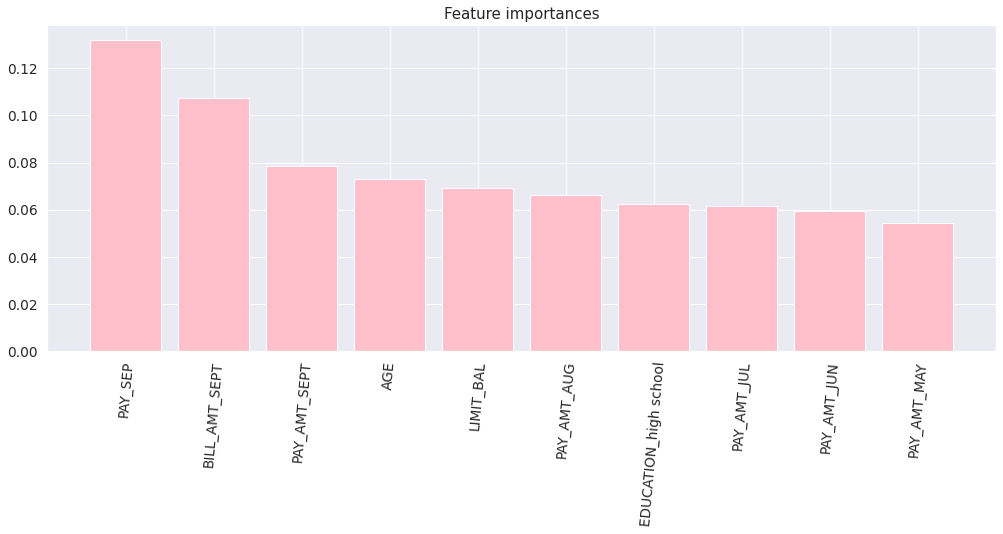

In [ ]:
# Feature Importance
feature_importances_rf = pd.DataFrame(rfc_hyper.feature_importances_,
                                   index = X.columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="pink",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

###**Neural Network Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier

Neuralclf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
Neuralclf.fit(X_train, y_train)
# MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              # solver='lbfgs'
method_names.append("Neural Network Classifier.")
method_scores.append(Neuralclf.score(X_test,y_test))

In [ ]:
trainEvaluation(X_train,y_train,Neuralclf)
testEvaluation(X_test,y_test,Neuralclf)

-----------------Train Set Evaluation--------------------
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      5389
           1       0.71      0.85      0.78      3945

    accuracy                           0.79      9334
   macro avg       0.79      0.80      0.79      9334
weighted avg       0.81      0.79      0.79      9334

[[4052 1337]
 [ 593 3352]]

Accuracy Score for model on Train Set:  0.7932290550674952


-----------------Test Set Evaluation--------------------
              precision    recall  f1-score   support

           0       0.87      0.75      0.80     21676
           1       0.71      0.84      0.77     15660

    accuracy                           0.79     37336
   macro avg       0.79      0.80      0.79     37336
weighted avg       0.80      0.79      0.79     37336

[[16217  5459]
 [ 2473 13187]]

Accuracy Score for model on Test:  0.7875508892221984


###**XGBoost Implementaion**

In [ ]:
#importing XG Boosting Classifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
#fitting data into XG Boosting Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
method_names.append("XGBoost Classifier.")
method_scores.append(xgb.score(X_test,y_test))

In [ ]:
trainEvaluation(X_train,y_train,xgb)
testEvaluation(X_test,y_test,xgb)

-----------------Train Set Evaluation--------------------
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      5184
           1       0.76      0.86      0.81      4150

    accuracy                           0.82      9334
   macro avg       0.82      0.83      0.82      9334
weighted avg       0.83      0.82      0.82      9334

[[4079 1105]
 [ 566 3584]]

Accuracy Score for model on Train Set:  0.8209770730662096


-----------------Test Set Evaluation--------------------
              precision    recall  f1-score   support

           0       0.87      0.77      0.82     20964
           1       0.75      0.85      0.80     16372

    accuracy                           0.81     37336
   macro avg       0.81      0.81      0.81     37336
weighted avg       0.82      0.81      0.81     37336

[[16246  4718]
 [ 2444 13928]]

Accuracy Score for model on Test:  0.8081744161131348


###**XGBoost with HyperParameter tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=10, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)
method_names.append("HyperparameterTune XGBoost.")
method_scores.append(gsearch1.score(X_test,y_test))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [ ]:
#model evaluation
trainEvaluation(X_train,y_train,gsearch1)
testEvaluation(X_test,y_test,gsearch1)

-----------------Train Set Evaluation--------------------
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4865
           1       0.85      0.90      0.87      4469

    accuracy                           0.88      9334
   macro avg       0.88      0.88      0.88      9334
weighted avg       0.88      0.88      0.88      9334

[[4180  685]
 [ 465 4004]]

Accuracy Score for model on Train Set:  0.876794514677523


-----------------Test Set Evaluation--------------------
              precision    recall  f1-score   support

           0       0.83      0.79      0.81     19745
           1       0.77      0.82      0.80     17591

    accuracy                           0.80     37336
   macro avg       0.80      0.80      0.80     37336
weighted avg       0.80      0.80      0.80     37336

[[15528  4217]
 [ 3162 14429]]

Accuracy Score for model on Test:  0.8023623312620527


**Model Comparison**

We completed seven different classification on this data and we see; Random Forest Classification is the best way to make classification on this dataset. Of course not everytime but for this practice Random Forest gave us the best classifications!

Let's see differences between our methods scores!

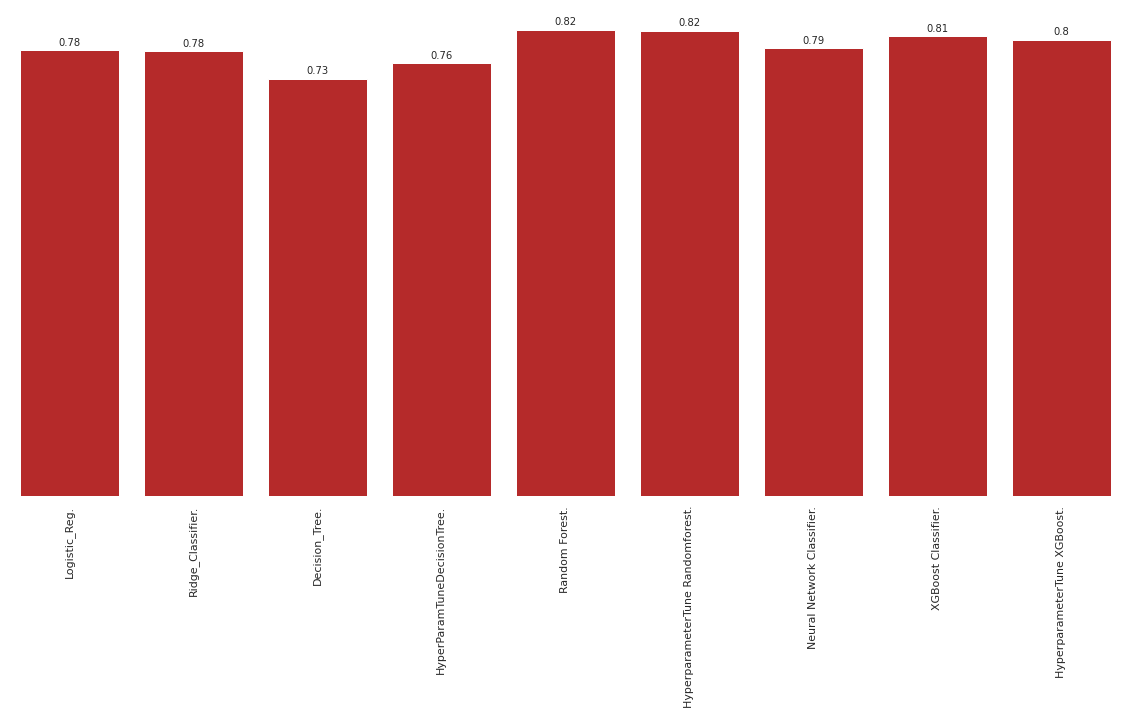

In [ ]:
fig, ax = plt.subplots(figsize=(20, 9))
bars = sns.barplot(x=method_names,y=method_scores,color='#CC1313',ax=ax)
for i in range(7):
 bars.patches[i]
 plt.xticks(rotation=90)
ax = plt.gca()
for spine in ax.spines.values():
     spine.set_visible(False)
plt.grid(False)
ax.axes.yaxis.set_ticklabels([])
for bar in bars.patches:
  bars.annotate(format(round(bar.get_height(),2)),(bar.get_x()+bar.get_width()/2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

Conclusion

After performing the various model we the get the best accuracy form the Random forest and XGBoost classifier.

Logestic Regression is the least accurate as compared to other models performed.

XGBoost has the best precision and the recall balance.

Higher recall can be achieved if low precision is acceptable.

Model can be improved with more data and computational resources